## Rikiddo -CPMM comparison

This is the first theoretical approach to Rikiddo's behavior compared to the CPMM, the most widely implemented model when referring to liquidity pools. It is important to clarify that this information is based on random simulations of transactions, **which are not remotely close to representing human behavior and the pertinent reactions to human incentives**.
The objective of this first approach is to see similarities and differences between these two market makers in the face of an identical sequence of operations.

In [1]:
from cpmm import CPMM
from rikiddo import RikiddoScoringRule
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cobyla
import math

initial_outcome = ['A', 'B']

n = 200
outcome = 0.001
amount = np.random.random([n]) * 500. 
outcomes = []
values = list(range(10))
for i in range(n):
    #outcomes += random.choices(list(range(len(initial_outcome))), weights=[random.choice(values),
    #                                                                       random.choice(values)])
    outcomes += random.choices(list(range(len(initial_outcome))))
    
operation = []
for i in range(n):
    for j in range(0,3):
        operation += [j]

outcomes = np.array(outcomes)
operation = np.array(operation)

In [2]:
initial_state = {0: 10000, 1: 10000, 'ZTG':10000}
cpmm = CPMM(initial_state = initial_state, fee = 0.03)

In [3]:
for i, a, o, r in zip(range(n),amount, outcomes, operation):
    if r == 0:
        #buy shares
        cpmm.buy_shares(a, asset_out= o)
    elif r == 1:
        #sell shares
        cpmm.sell_shares(a, asset_in=o)
    else:
        #provide liquidity
        cpmm.provide_liquidity(id= i, amount = a)
        
    print(cpmm.get_prices())

{0: 0.491563772071282, 1: 0.5084362279287181}
{0: 0.49850100100760314, 1: 0.5014989989923969}
{0: 0.49851741950160694, 1: 0.501482580498393}
{0: 0.5038324050239363, 1: 0.49616759497606366}
{0: 0.49381572197907664, 1: 0.5061842780209234}
{0: 0.49404384421896846, 1: 0.5059561557810316}
{0: 0.49131900325509137, 1: 0.5086809967449086}
{0: 0.4935835366664569, 1: 0.5064164633335432}
{0: 0.49375481838872975, 1: 0.5062451816112703}
{0: 0.502089914739984, 1: 0.4979100852600161}
{0: 0.5001378162613926, 1: 0.49986218373860736}
{0: 0.5001374490078501, 1: 0.49986255099215}
{0: 0.5101466501053059, 1: 0.48985334989469403}
{0: 0.5209531877753183, 1: 0.4790468122246818}
{0: 0.5201321424864433, 1: 0.47986785751355665}
{0: 0.5302430205022962, 1: 0.46975697949770373}
{0: 0.5321680013658093, 1: 0.46783199863419056}
{0: 0.5317966562349392, 1: 0.46820334376506073}
{0: 0.5382214008548729, 1: 0.461778599145127}
{0: 0.529752719275173, 1: 0.470247280724827}
{0: 0.5283500919802421, 1: 0.4716499080197579}
{0: 0.52

In [4]:
list(cpmm.get_prices().values())

[0.5375986818614369, 0.462401318138563]

In [5]:
rsc = RikiddoScoringRule(initial_outcome, n_params = [0.2, 10, 2], init=10., vig=0.1)

In [6]:
#rsc = RikiddoScoringRule(initial_outcome, vig = 0.02, n_params = [1.2, 4.5, 2], mrc=0.1) 
#rsc.initial_liquidity(initial_outcome, 10000)

In [7]:
for i, a, o, r in zip(range(n),amount, outcomes, operation):

    if r == 0:
        #buy shares
        rsc.buy_shares('Trader-%d'%(i), a, int(o))
    #else:
    #    rsc.sell_shares('Trader-%d'%(i), a, int(o))
    elif r == 1:
        #sell shares
        rsc.sell_shares('Trader-%d'%(i), a, int(o))
    else:
        #provide liquidity
        rsc.liquidity_providing('Trader-%d'%(i), a)
    
    rsc.outcome_probability()

Trader-0 BOUGHT 355.54 shares of outcome 1
Trader-1 SOLD 284.11 shares of outcome 0
Trader-2 provided liquidity the equivalent to 106.80 ZTG. 3.55 units of asset 1, and 103.25 units of asset 2
Trader-3 BOUGHT 5716.86 shares of outcome 0
Trader-4 SOLD 400.96 shares of outcome 1
Trader-5 provided liquidity the equivalent to 355.39 ZTG. 339.40 units of asset 1, and 16.00 units of asset 2
Trader-6 BOUGHT 1581.81 shares of outcome 1
Trader-7 SOLD 92.28 shares of outcome 0
Trader-8 provided liquidity the equivalent to 258.08 ZTG. 218.52 units of asset 1, and 39.56 units of asset 2
Trader-9 BOUGHT 404.27 shares of outcome 0
Trader-10 SOLD 81.73 shares of outcome 1
Trader-11 provided liquidity the equivalent to 25.27 ZTG. 21.68 units of asset 1, and 3.59 units of asset 2
Trader-12 BOUGHT 493.38 shares of outcome 0
Trader-13 SOLD 444.84 shares of outcome 0
Trader-14 provided liquidity the equivalent to 363.87 ZTG. 316.25 units of asset 1, and 47.62 units of asset 2
Trader-15 BOUGHT 494.00 share

Trader-129 BOUGHT 392.60 shares of outcome 0
Trader-130 SOLD 169.42 shares of outcome 1
Trader-131 provided liquidity the equivalent to 7.23 ZTG. 3.15 units of asset 1, and 4.09 units of asset 2
Trader-132 BOUGHT 593.88 shares of outcome 1
Trader-133 SOLD 78.43 shares of outcome 0
Trader-134 provided liquidity the equivalent to 363.71 ZTG. 152.64 units of asset 1, and 211.07 units of asset 2
Trader-135 BOUGHT 747.25 shares of outcome 0
Trader-136 SOLD 335.79 shares of outcome 0
Trader-137 provided liquidity the equivalent to 135.47 ZTG. 59.68 units of asset 1, and 75.78 units of asset 2
Trader-138 BOUGHT 591.10 shares of outcome 0
Trader-139 SOLD 395.30 shares of outcome 0
Trader-140 provided liquidity the equivalent to 24.25 ZTG. 11.06 units of asset 1, and 13.18 units of asset 2
Trader-141 BOUGHT 271.29 shares of outcome 1
Trader-142 SOLD 214.05 shares of outcome 0
Trader-143 provided liquidity the equivalent to 292.56 ZTG. 131.53 units of asset 1, and 161.03 units of asset 2
Trader-

In [8]:
rsc.outcome_probability()

array([0.56043574, 0.43956426])

In [9]:
rsc.book

,name,shares,outcome,paid,cost_function,dynamic_fee,lp
0,Trader-0,355.53778008163863,1,353.537639,364.100708,0.000000,0
1,Trader-1,-284.107294,0,3.318129,364.100708,0.000000,0
2,Trader-2,3.547479,A,0.033217,364.100708,0.000000,1
3,Trader-2,103.250805,B,0.966783,364.100708,0.000000,1
4,Trader-3,5716.85621584834,0,223.044866,5802.677938,0.000000,0
...,...,...,...,...,...,...,...
261,Trader-196,-196.560203,1,85.498055,28062.742602,0.060665,0
262,Trader-197,236.969732,A,0.565034,28062.742602,0.000000,1
263,Trader-197,182.420514,B,0.434966,28062.742602,0.000000,1
264,Trader-198,119.63590671757736,1,52.350296,28093.039525,0.058707,0


In [10]:
#plt.plot(rsc.book['fee_cost'])
#plt.show()

In [11]:
#cpmm._history

In [12]:
rsc_asset1 = []
rsc_asset2 = list([])
for i in list(rsc._history):
    rsc_asset1.append(i[0])
    rsc_asset2.append(i[1])

cpmm_asset1 = list([])
cpmm_asset2 = list([])
for i in cpmm._history:
    cpmm_asset1.append(i[0])
    cpmm_asset2.append(i[1])

#assert(len(rsc_asset1) == len(cpmm_asset1) == len(rsc_asset2) == len(cpmm_asset2))

In [13]:
df = pd.DataFrame([rsc_asset1, rsc_asset2, cpmm_asset1, cpmm_asset2]).T
#df = df.T
df.columns = ['rsc_asset1', 'rsc_asset2', 'cpmm_asset1', 'cpmm_asset2']
df

,rsc_asset1,rsc_asset2,cpmm_asset1,cpmm_asset2
0,0.033217,0.966783,0.491564,0.508436
1,0.033217,0.966783,0.498501,0.501499
2,0.033217,0.966783,0.498517,0.501483
3,0.954992,0.045008,0.503832,0.496168
4,0.954992,0.045008,0.493816,0.506184
...,...,...,...,...
195,0.563192,0.436808,0.542790,0.457210
196,0.565034,0.434966,0.537828,0.462172
197,0.563545,0.436455,0.535158,0.464842
198,0.561371,0.438629,0.533851,0.466149


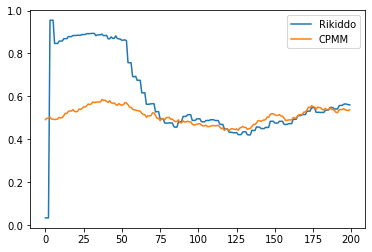

In [14]:
plt.plot(df['rsc_asset1'], label='Rikiddo')
plt.plot(df['cpmm_asset1'], label= 'CPMM')
plt.legend()
plt.show()

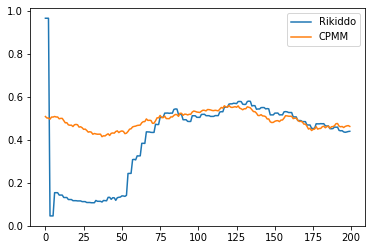

In [15]:
plt.plot(df['rsc_asset2'], label='Rikiddo')
plt.plot(df['cpmm_asset2'], label= 'CPMM')
plt.legend()
plt.show()

In [16]:
for i in range(10):
    first = random.choice([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 
                           1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3])
    second = random.choice([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6.5, 7, 7.5, 8])
    print(f'Iterating for a first parameter equal to {first} and a second one equal to {second}')
    try:
        rsc = RikiddoScoringRule(initial_outcome, n_params = [first, second, 2])
        #rsc = RikiddoScoringRule(initial_outcome, n_params = [first, second, 2]) 
        
        for i, a, o, r in zip(range(n),amount, outcomes, operation):
            if r == 0:
                #buy shares
                rsc.buy_shares('Trader-%d'%(i), a, int(o))
            elif r == 1:
                #sell shares
                rsc.sell_shares('Trader-%d'%(i), a, int(o))
            else:
                #provide liquidity
                rsc.liquidity_providing('Trader-%d'%(i), a)
                


        rsc_asset1 = list([])
        rsc_asset2 = list([])
        for i in list(rsc._history):
            rsc_asset1.append(i[0])
            rsc_asset2.append(i[1])

        df[f'rsc_asset1_{first}_{second}'] = pd.Series(rsc_asset1)
        df[f'rsc_asset2_{first}_{second}'] = pd.Series(rsc_asset2)
    except:
        print('val error')
        pass

Iterating for a first parameter equal to 1.2 and a second one equal to 4
Trader-0 BOUGHT 707.08 shares of outcome 1
Trader-1 SOLD 284.11 shares of outcome 0
Trader-2 provided liquidity the equivalent to 106.80 ZTG. 3.25 units of asset 1, and 103.55 units of asset 2


/Users/numacodes/Developer/Zeitgeist/rikiddo_cpmm_compare/rikiddo.py:105: RuntimeWarning: overflow encountered in exp
  return self.b*np.log(np.exp(x/self.b).sum())


Trader-3 BOUGHT 6327.63 shares of outcome 0
Trader-4 SOLD 400.96 shares of outcome 1
Trader-5 provided liquidity the equivalent to 355.39 ZTG. 334.41 units of asset 1, and 20.98 units of asset 2
Trader-6 BOUGHT 1365.94 shares of outcome 1
Trader-7 SOLD 92.28 shares of outcome 0
Trader-8 provided liquidity the equivalent to 258.08 ZTG. 220.04 units of asset 1, and 38.04 units of asset 2
Trader-9 BOUGHT 402.15 shares of outcome 0
Trader-10 SOLD 81.73 shares of outcome 1
Trader-11 provided liquidity the equivalent to 25.27 ZTG. 21.79 units of asset 1, and 3.48 units of asset 2
Trader-12 BOUGHT 491.66 shares of outcome 0
Trader-13 SOLD 444.84 shares of outcome 0
Trader-14 provided liquidity the equivalent to 363.87 ZTG. 317.33 units of asset 1, and 46.54 units of asset 2
Trader-15 BOUGHT 492.92 shares of outcome 0
Trader-16 SOLD 83.69 shares of outcome 0
Trader-17 provided liquidity the equivalent to 105.38 ZTG. 92.79 units of asset 1, and 12.59 units of asset 2
Trader-18 BOUGHT 320.82 sha

Trader-132 BOUGHT 662.27 shares of outcome 1
Trader-133 SOLD 78.43 shares of outcome 0
Trader-134 provided liquidity the equivalent to 363.71 ZTG. 175.40 units of asset 1, and 188.31 units of asset 2
Trader-135 BOUGHT 661.44 shares of outcome 0
Trader-136 SOLD 335.79 shares of outcome 0
Trader-137 provided liquidity the equivalent to 135.47 ZTG. 66.28 units of asset 1, and 69.19 units of asset 2
Trader-138 BOUGHT 538.51 shares of outcome 0
Trader-139 SOLD 395.30 shares of outcome 0
Trader-140 provided liquidity the equivalent to 24.25 ZTG. 12.00 units of asset 1, and 12.24 units of asset 2
Trader-141 BOUGHT 292.94 shares of outcome 1
Trader-142 SOLD 214.05 shares of outcome 0
Trader-143 provided liquidity the equivalent to 292.56 ZTG. 143.84 units of asset 1, and 148.72 units of asset 2
Trader-144 BOUGHT 212.08 shares of outcome 0
Trader-145 SOLD 383.55 shares of outcome 0
Trader-146 provided liquidity the equivalent to 409.47 ZTG. 202.01 units of asset 1, and 207.46 units of asset 2
T

Trader-57 BOUGHT 908.43 shares of outcome 1
Trader-58 SOLD 87.19 shares of outcome 1
Trader-59 provided liquidity the equivalent to 310.75 ZTG. 197.72 units of asset 1, and 113.03 units of asset 2
Trader-60 BOUGHT 304.34 shares of outcome 1
Trader-61 SOLD 38.00 shares of outcome 1
Trader-62 provided liquidity the equivalent to 241.86 ZTG. 153.40 units of asset 1, and 88.46 units of asset 2
Trader-63 BOUGHT 1051.79 shares of outcome 1
Trader-64 SOLD 192.61 shares of outcome 1
Trader-65 provided liquidity the equivalent to 75.78 ZTG. 45.33 units of asset 1, and 30.46 units of asset 2
Trader-66 BOUGHT 1157.90 shares of outcome 1
Trader-67 SOLD 262.70 shares of outcome 0
Trader-68 provided liquidity the equivalent to 468.47 ZTG. 266.74 units of asset 1, and 201.74 units of asset 2
Trader-69 BOUGHT 49.39 shares of outcome 0
Trader-70 SOLD 471.90 shares of outcome 0
Trader-71 provided liquidity the equivalent to 152.44 ZTG. 87.24 units of asset 1, and 65.20 units of asset 2
Trader-72 BOUGHT 

Trader-181 SOLD 294.05 shares of outcome 1
Trader-182 provided liquidity the equivalent to 381.79 ZTG. 200.22 units of asset 1, and 181.57 units of asset 2
Trader-183 BOUGHT 531.65 shares of outcome 0
Trader-184 SOLD 193.68 shares of outcome 1
Trader-185 provided liquidity the equivalent to 411.04 ZTG. 218.34 units of asset 1, and 192.70 units of asset 2
Trader-186 BOUGHT 719.58 shares of outcome 0
Trader-187 SOLD 260.98 shares of outcome 1
Trader-188 provided liquidity the equivalent to 143.35 ZTG. 76.97 units of asset 1, and 66.38 units of asset 2
Trader-189 BOUGHT 324.89 shares of outcome 1
Trader-190 SOLD 359.79 shares of outcome 1
Trader-191 provided liquidity the equivalent to 177.40 ZTG. 94.51 units of asset 1, and 82.89 units of asset 2
Trader-192 BOUGHT 907.08 shares of outcome 0
Trader-193 SOLD 110.11 shares of outcome 0
Trader-194 provided liquidity the equivalent to 213.03 ZTG. 115.82 units of asset 1, and 97.21 units of asset 2
Trader-195 BOUGHT 362.01 shares of outcome 0


Trader-111 BOUGHT 124.10 shares of outcome 1
Trader-112 SOLD 38.78 shares of outcome 0
Trader-113 provided liquidity the equivalent to 313.07 ZTG. 162.21 units of asset 1, and 150.86 units of asset 2
Trader-114 BOUGHT 611.27 shares of outcome 1
Trader-115 SOLD 278.21 shares of outcome 1
Trader-116 provided liquidity the equivalent to 426.33 ZTG. 217.25 units of asset 1, and 209.08 units of asset 2
Trader-117 BOUGHT 819.42 shares of outcome 1
Trader-118 SOLD 211.18 shares of outcome 0
Trader-119 provided liquidity the equivalent to 138.06 ZTG. 68.47 units of asset 1, and 69.58 units of asset 2
Trader-120 BOUGHT 625.49 shares of outcome 1
Trader-121 SOLD 282.51 shares of outcome 0
Trader-122 provided liquidity the equivalent to 243.60 ZTG. 118.57 units of asset 1, and 125.03 units of asset 2
Trader-123 BOUGHT 114.59 shares of outcome 1
Trader-124 SOLD 78.03 shares of outcome 1
Trader-125 provided liquidity the equivalent to 340.09 ZTG. 165.06 units of asset 1, and 175.03 units of asset 2

Trader-38 provided liquidity the equivalent to 427.32 ZTG. 334.16 units of asset 1, and 93.16 units of asset 2
Trader-39 BOUGHT 40.54 shares of outcome 0
Trader-40 SOLD 220.90 shares of outcome 1
Trader-41 provided liquidity the equivalent to 498.84 ZTG. 351.11 units of asset 1, and 147.74 units of asset 2
Trader-42 BOUGHT 483.16 shares of outcome 0
Trader-43 SOLD 369.72 shares of outcome 1
Trader-44 provided liquidity the equivalent to 217.62 ZTG. 136.69 units of asset 1, and 80.94 units of asset 2
Trader-45 BOUGHT 63.68 shares of outcome 0
Trader-46 SOLD 283.46 shares of outcome 1
Trader-47 provided liquidity the equivalent to 415.16 ZTG. 264.95 units of asset 1, and 150.22 units of asset 2
Trader-48 BOUGHT 481.88 shares of outcome 0
Trader-49 SOLD 198.42 shares of outcome 1
Trader-50 provided liquidity the equivalent to 332.18 ZTG. 199.78 units of asset 1, and 132.40 units of asset 2
Trader-51 BOUGHT 145.93 shares of outcome 0
Trader-52 SOLD 366.38 shares of outcome 0
Trader-53 prov

Trader-162 BOUGHT 830.89 shares of outcome 0
Trader-163 SOLD 82.46 shares of outcome 1
Trader-164 provided liquidity the equivalent to 39.60 ZTG. 20.06 units of asset 1, and 19.54 units of asset 2
Trader-165 BOUGHT 764.63 shares of outcome 0
Trader-166 SOLD 215.23 shares of outcome 0
Trader-167 provided liquidity the equivalent to 214.24 ZTG. 109.38 units of asset 1, and 104.86 units of asset 2
Trader-168 BOUGHT 215.13 shares of outcome 0
Trader-169 SOLD 386.87 shares of outcome 0
Trader-170 provided liquidity the equivalent to 52.51 ZTG. 26.86 units of asset 1, and 25.65 units of asset 2
Trader-171 BOUGHT 765.72 shares of outcome 0
Trader-172 SOLD 495.89 shares of outcome 0
Trader-173 provided liquidity the equivalent to 472.83 ZTG. 243.64 units of asset 1, and 229.19 units of asset 2
Trader-174 BOUGHT 801.73 shares of outcome 0
Trader-175 SOLD 195.66 shares of outcome 1
Trader-176 provided liquidity the equivalent to 208.21 ZTG. 108.17 units of asset 1, and 100.04 units of asset 2
Tr

Trader-87 BOUGHT 546.80 shares of outcome 0
Trader-88 SOLD 482.95 shares of outcome 1
Trader-89 provided liquidity the equivalent to 56.17 ZTG. 29.39 units of asset 1, and 26.78 units of asset 2
Trader-90 BOUGHT 620.78 shares of outcome 0
Trader-91 SOLD 191.50 shares of outcome 1
Trader-92 provided liquidity the equivalent to 209.91 ZTG. 112.75 units of asset 1, and 97.16 units of asset 2
Trader-93 BOUGHT 209.68 shares of outcome 0
Trader-94 SOLD 108.27 shares of outcome 1
Trader-95 provided liquidity the equivalent to 52.19 ZTG. 28.38 units of asset 1, and 23.82 units of asset 2
Trader-96 BOUGHT 811.29 shares of outcome 1
Trader-97 SOLD 169.23 shares of outcome 1
Trader-98 provided liquidity the equivalent to 372.29 ZTG. 193.81 units of asset 1, and 178.48 units of asset 2
Trader-99 BOUGHT 201.64 shares of outcome 0
Trader-100 SOLD 26.56 shares of outcome 0
Trader-101 provided liquidity the equivalent to 303.29 ZTG. 157.95 units of asset 1, and 145.34 units of asset 2
Trader-102 BOUGH

Trader-24 BOUGHT 218.23 shares of outcome 0
Trader-25 SOLD 312.62 shares of outcome 0
Trader-26 provided liquidity the equivalent to 228.25 ZTG. 202.99 units of asset 1, and 25.26 units of asset 2
Trader-27 BOUGHT 300.26 shares of outcome 0
Trader-28 SOLD 323.02 shares of outcome 0
Trader-29 provided liquidity the equivalent to 250.22 ZTG. 223.47 units of asset 1, and 26.75 units of asset 2
Trader-30 BOUGHT 92.45 shares of outcome 0
Trader-31 SOLD 384.82 shares of outcome 0
Trader-32 provided liquidity the equivalent to 402.14 ZTG. 359.59 units of asset 1, and 42.55 units of asset 2
Trader-33 BOUGHT 87.15 shares of outcome 0
Trader-34 SOLD 55.47 shares of outcome 0
Trader-35 provided liquidity the equivalent to 43.70 ZTG. 36.11 units of asset 1, and 7.59 units of asset 2
Trader-36 BOUGHT 2.79 shares of outcome 0
Trader-37 SOLD 450.11 shares of outcome 0
Trader-38 provided liquidity the equivalent to 427.32 ZTG. 362.78 units of asset 1, and 64.55 units of asset 2
Trader-39 BOUGHT 35.36 

Trader-149 provided liquidity the equivalent to 282.96 ZTG. 143.15 units of asset 1, and 139.80 units of asset 2
Trader-150 BOUGHT 379.39 shares of outcome 1
Trader-151 SOLD 95.62 shares of outcome 1
Trader-152 provided liquidity the equivalent to 242.71 ZTG. 121.79 units of asset 1, and 120.92 units of asset 2
Trader-153 BOUGHT 332.23 shares of outcome 0
Trader-154 SOLD 259.85 shares of outcome 1
Trader-155 provided liquidity the equivalent to 366.55 ZTG. 185.33 units of asset 1, and 181.22 units of asset 2
Trader-156 BOUGHT 658.75 shares of outcome 1
Trader-157 SOLD 411.55 shares of outcome 1
Trader-158 provided liquidity the equivalent to 341.52 ZTG. 170.24 units of asset 1, and 171.28 units of asset 2
Trader-159 BOUGHT 119.14 shares of outcome 0
Trader-160 SOLD 2.06 shares of outcome 1
Trader-161 provided liquidity the equivalent to 254.33 ZTG. 127.11 units of asset 1, and 127.22 units of asset 2
Trader-162 BOUGHT 832.94 shares of outcome 0
Trader-163 SOLD 82.46 shares of outcome 1

Trader-75 BOUGHT 890.53 shares of outcome 1
Trader-76 SOLD 358.76 shares of outcome 0
Trader-77 provided liquidity the equivalent to 160.44 ZTG. 84.90 units of asset 1, and 75.54 units of asset 2
Trader-78 BOUGHT 555.06 shares of outcome 1
Trader-79 SOLD 406.04 shares of outcome 0
Trader-80 provided liquidity the equivalent to 164.05 ZTG. 85.75 units of asset 1, and 78.30 units of asset 2
Trader-81 BOUGHT 30.15 shares of outcome 0
Trader-82 SOLD 284.61 shares of outcome 1
Trader-83 provided liquidity the equivalent to 493.90 ZTG. 260.87 units of asset 1, and 233.03 units of asset 2
Trader-84 BOUGHT 537.74 shares of outcome 1
Trader-85 SOLD 158.60 shares of outcome 1
Trader-86 provided liquidity the equivalent to 443.32 ZTG. 230.57 units of asset 1, and 212.75 units of asset 2
Trader-87 BOUGHT 540.34 shares of outcome 0
Trader-88 SOLD 482.95 shares of outcome 1
Trader-89 provided liquidity the equivalent to 56.17 ZTG. 29.59 units of asset 1, and 26.58 units of asset 2
Trader-90 BOUGHT 6

Trader-3 BOUGHT 6327.63 shares of outcome 0
Trader-4 SOLD 400.96 shares of outcome 1
Trader-5 provided liquidity the equivalent to 355.39 ZTG. 334.41 units of asset 1, and 20.98 units of asset 2
Trader-6 BOUGHT 1365.94 shares of outcome 1
Trader-7 SOLD 92.28 shares of outcome 0
Trader-8 provided liquidity the equivalent to 258.08 ZTG. 220.04 units of asset 1, and 38.04 units of asset 2
Trader-9 BOUGHT 402.15 shares of outcome 0
Trader-10 SOLD 81.73 shares of outcome 1
Trader-11 provided liquidity the equivalent to 25.27 ZTG. 21.79 units of asset 1, and 3.48 units of asset 2
Trader-12 BOUGHT 491.66 shares of outcome 0
Trader-13 SOLD 444.84 shares of outcome 0
Trader-14 provided liquidity the equivalent to 363.87 ZTG. 317.33 units of asset 1, and 46.54 units of asset 2
Trader-15 BOUGHT 492.92 shares of outcome 0
Trader-16 SOLD 83.69 shares of outcome 0
Trader-17 provided liquidity the equivalent to 105.38 ZTG. 92.79 units of asset 1, and 12.59 units of asset 2
Trader-18 BOUGHT 320.82 sha

Trader-130 SOLD 169.42 shares of outcome 1
Trader-131 provided liquidity the equivalent to 7.23 ZTG. 3.49 units of asset 1, and 3.74 units of asset 2
Trader-132 BOUGHT 651.60 shares of outcome 1
Trader-133 SOLD 78.43 shares of outcome 0
Trader-134 provided liquidity the equivalent to 363.71 ZTG. 171.92 units of asset 1, and 191.79 units of asset 2
Trader-135 BOUGHT 672.66 shares of outcome 0
Trader-136 SOLD 335.79 shares of outcome 0
Trader-137 provided liquidity the equivalent to 135.47 ZTG. 65.29 units of asset 1, and 70.17 units of asset 2
Trader-138 BOUGHT 545.52 shares of outcome 0
Trader-139 SOLD 395.30 shares of outcome 0
Trader-140 provided liquidity the equivalent to 24.25 ZTG. 11.87 units of asset 1, and 12.38 units of asset 2
Trader-141 BOUGHT 289.52 shares of outcome 1
Trader-142 SOLD 214.05 shares of outcome 0
Trader-143 provided liquidity the equivalent to 292.56 ZTG. 141.96 units of asset 1, and 150.60 units of asset 2
Trader-144 BOUGHT 214.74 shares of outcome 0
Trader-

Trader-57 BOUGHT 756.34 shares of outcome 1
Trader-58 SOLD 87.19 shares of outcome 1
Trader-59 provided liquidity the equivalent to 310.75 ZTG. 180.52 units of asset 1, and 130.23 units of asset 2
Trader-60 BOUGHT 264.22 shares of outcome 1
Trader-61 SOLD 38.00 shares of outcome 1
Trader-62 provided liquidity the equivalent to 241.86 ZTG. 141.13 units of asset 1, and 100.73 units of asset 2
Trader-63 BOUGHT 941.21 shares of outcome 1
Trader-64 SOLD 192.61 shares of outcome 1
Trader-65 provided liquidity the equivalent to 75.78 ZTG. 42.65 units of asset 1, and 33.13 units of asset 2
Trader-66 BOUGHT 1080.30 shares of outcome 1
Trader-67 SOLD 262.70 shares of outcome 0
Trader-68 provided liquidity the equivalent to 468.47 ZTG. 256.89 units of asset 1, and 211.58 units of asset 2
Trader-69 BOUGHT 51.35 shares of outcome 0
Trader-70 SOLD 471.90 shares of outcome 0
Trader-71 provided liquidity the equivalent to 152.44 ZTG. 84.01 units of asset 1, and 68.44 units of asset 2
Trader-72 BOUGHT 

Trader-183 BOUGHT 538.38 shares of outcome 0
Trader-184 SOLD 193.68 shares of outcome 1
Trader-185 provided liquidity the equivalent to 411.04 ZTG. 215.16 units of asset 1, and 195.88 units of asset 2
Trader-186 BOUGHT 732.98 shares of outcome 0
Trader-187 SOLD 260.98 shares of outcome 1
Trader-188 provided liquidity the equivalent to 143.35 ZTG. 75.36 units of asset 1, and 67.99 units of asset 2
Trader-189 BOUGHT 317.77 shares of outcome 1
Trader-190 SOLD 359.79 shares of outcome 1
Trader-191 provided liquidity the equivalent to 177.40 ZTG. 92.81 units of asset 1, and 84.59 units of asset 2
Trader-192 BOUGHT 927.34 shares of outcome 0
Trader-193 SOLD 110.11 shares of outcome 0
Trader-194 provided liquidity the equivalent to 213.03 ZTG. 112.93 units of asset 1, and 100.10 units of asset 2
Trader-195 BOUGHT 371.82 shares of outcome 0
Trader-196 SOLD 196.56 shares of outcome 1
Trader-197 provided liquidity the equivalent to 419.39 ZTG. 223.82 units of asset 1, and 195.57 units of asset 2

Trader-108 BOUGHT 99.05 shares of outcome 0
Trader-109 SOLD 92.85 shares of outcome 0
Trader-110 provided liquidity the equivalent to 126.70 ZTG. 66.00 units of asset 1, and 60.70 units of asset 2
Trader-111 BOUGHT 124.20 shares of outcome 1
Trader-112 SOLD 38.78 shares of outcome 0
Trader-113 provided liquidity the equivalent to 313.07 ZTG. 162.36 units of asset 1, and 150.71 units of asset 2
Trader-114 BOUGHT 612.65 shares of outcome 1
Trader-115 SOLD 278.21 shares of outcome 1
Trader-116 provided liquidity the equivalent to 426.33 ZTG. 218.24 units of asset 1, and 208.09 units of asset 2
Trader-117 BOUGHT 824.46 shares of outcome 1
Trader-118 SOLD 211.18 shares of outcome 0
Trader-119 provided liquidity the equivalent to 138.06 ZTG. 68.97 units of asset 1, and 69.09 units of asset 2
Trader-120 BOUGHT 630.77 shares of outcome 1
Trader-121 SOLD 282.51 shares of outcome 0
Trader-122 provided liquidity the equivalent to 243.60 ZTG. 119.75 units of asset 1, and 123.85 units of asset 2
Tr

In [17]:
df

,rsc_asset1,rsc_asset2,cpmm_asset1,cpmm_asset2,rsc_asset1_1.2_4,rsc_asset2_1.2_4,rsc_asset1_0.9_7.5,rsc_asset2_0.9_7.5,rsc_asset1_1.3_8,rsc_asset2_1.3_8,...,rsc_asset1_1.5_5.5,rsc_asset2_1.5_5.5,rsc_asset1_2_7.5,rsc_asset2_2_7.5,rsc_asset1_0.8_4,rsc_asset2_0.8_4,rsc_asset1_2.2_7,rsc_asset2_2.2_7,rsc_asset1_1.7_8,rsc_asset2_1.7_8
0,0.033217,0.966783,0.491564,0.508436,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553,...,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553
1,0.033217,0.966783,0.498501,0.501499,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553,...,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553
2,0.033217,0.966783,0.498517,0.501483,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553,...,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553,0.030447,0.969553
3,0.954992,0.045008,0.503832,0.496168,0.940958,0.059042,0.940958,0.059042,0.940958,0.059042,...,0.940958,0.059042,0.940958,0.059042,0.940958,0.059042,0.940958,0.059042,0.940958,0.059042
4,0.954992,0.045008,0.493816,0.506184,0.940958,0.059042,0.940958,0.059042,0.940958,0.059042,...,0.940958,0.059042,0.940958,0.059042,0.940958,0.059042,0.940958,0.059042,0.940958,0.059042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.563192,0.436808,0.542790,0.457210,0.536223,0.463777,0.545071,0.454929,0.539871,0.460129,...,0.534771,0.465229,0.532246,0.467754,0.542666,0.457334,0.530058,0.469942,0.535434,0.464566
196,0.565034,0.434966,0.537828,0.462172,0.539817,0.460183,0.549044,0.450956,0.544060,0.455940,...,0.538527,0.461473,0.536063,0.463937,0.546379,0.453621,0.533677,0.466323,0.539381,0.460619
197,0.563545,0.436455,0.535158,0.464842,0.536881,0.463119,0.545927,0.454073,0.540617,0.459383,...,0.535461,0.464539,0.532947,0.467053,0.543453,0.456547,0.530857,0.469143,0.536164,0.463836
198,0.561371,0.438629,0.533851,0.466149,0.536394,0.463606,0.545095,0.454905,0.539892,0.460108,...,0.535057,0.464943,0.532649,0.467351,0.542687,0.457313,0.530470,0.469530,0.535766,0.464234


In [18]:
asset1_cols = []
asset2_cols = []
for col in df.columns:
    if 'asset1' in col:
        asset1_cols += [col]
    elif 'asset2' in col:
        asset2_cols += [col]

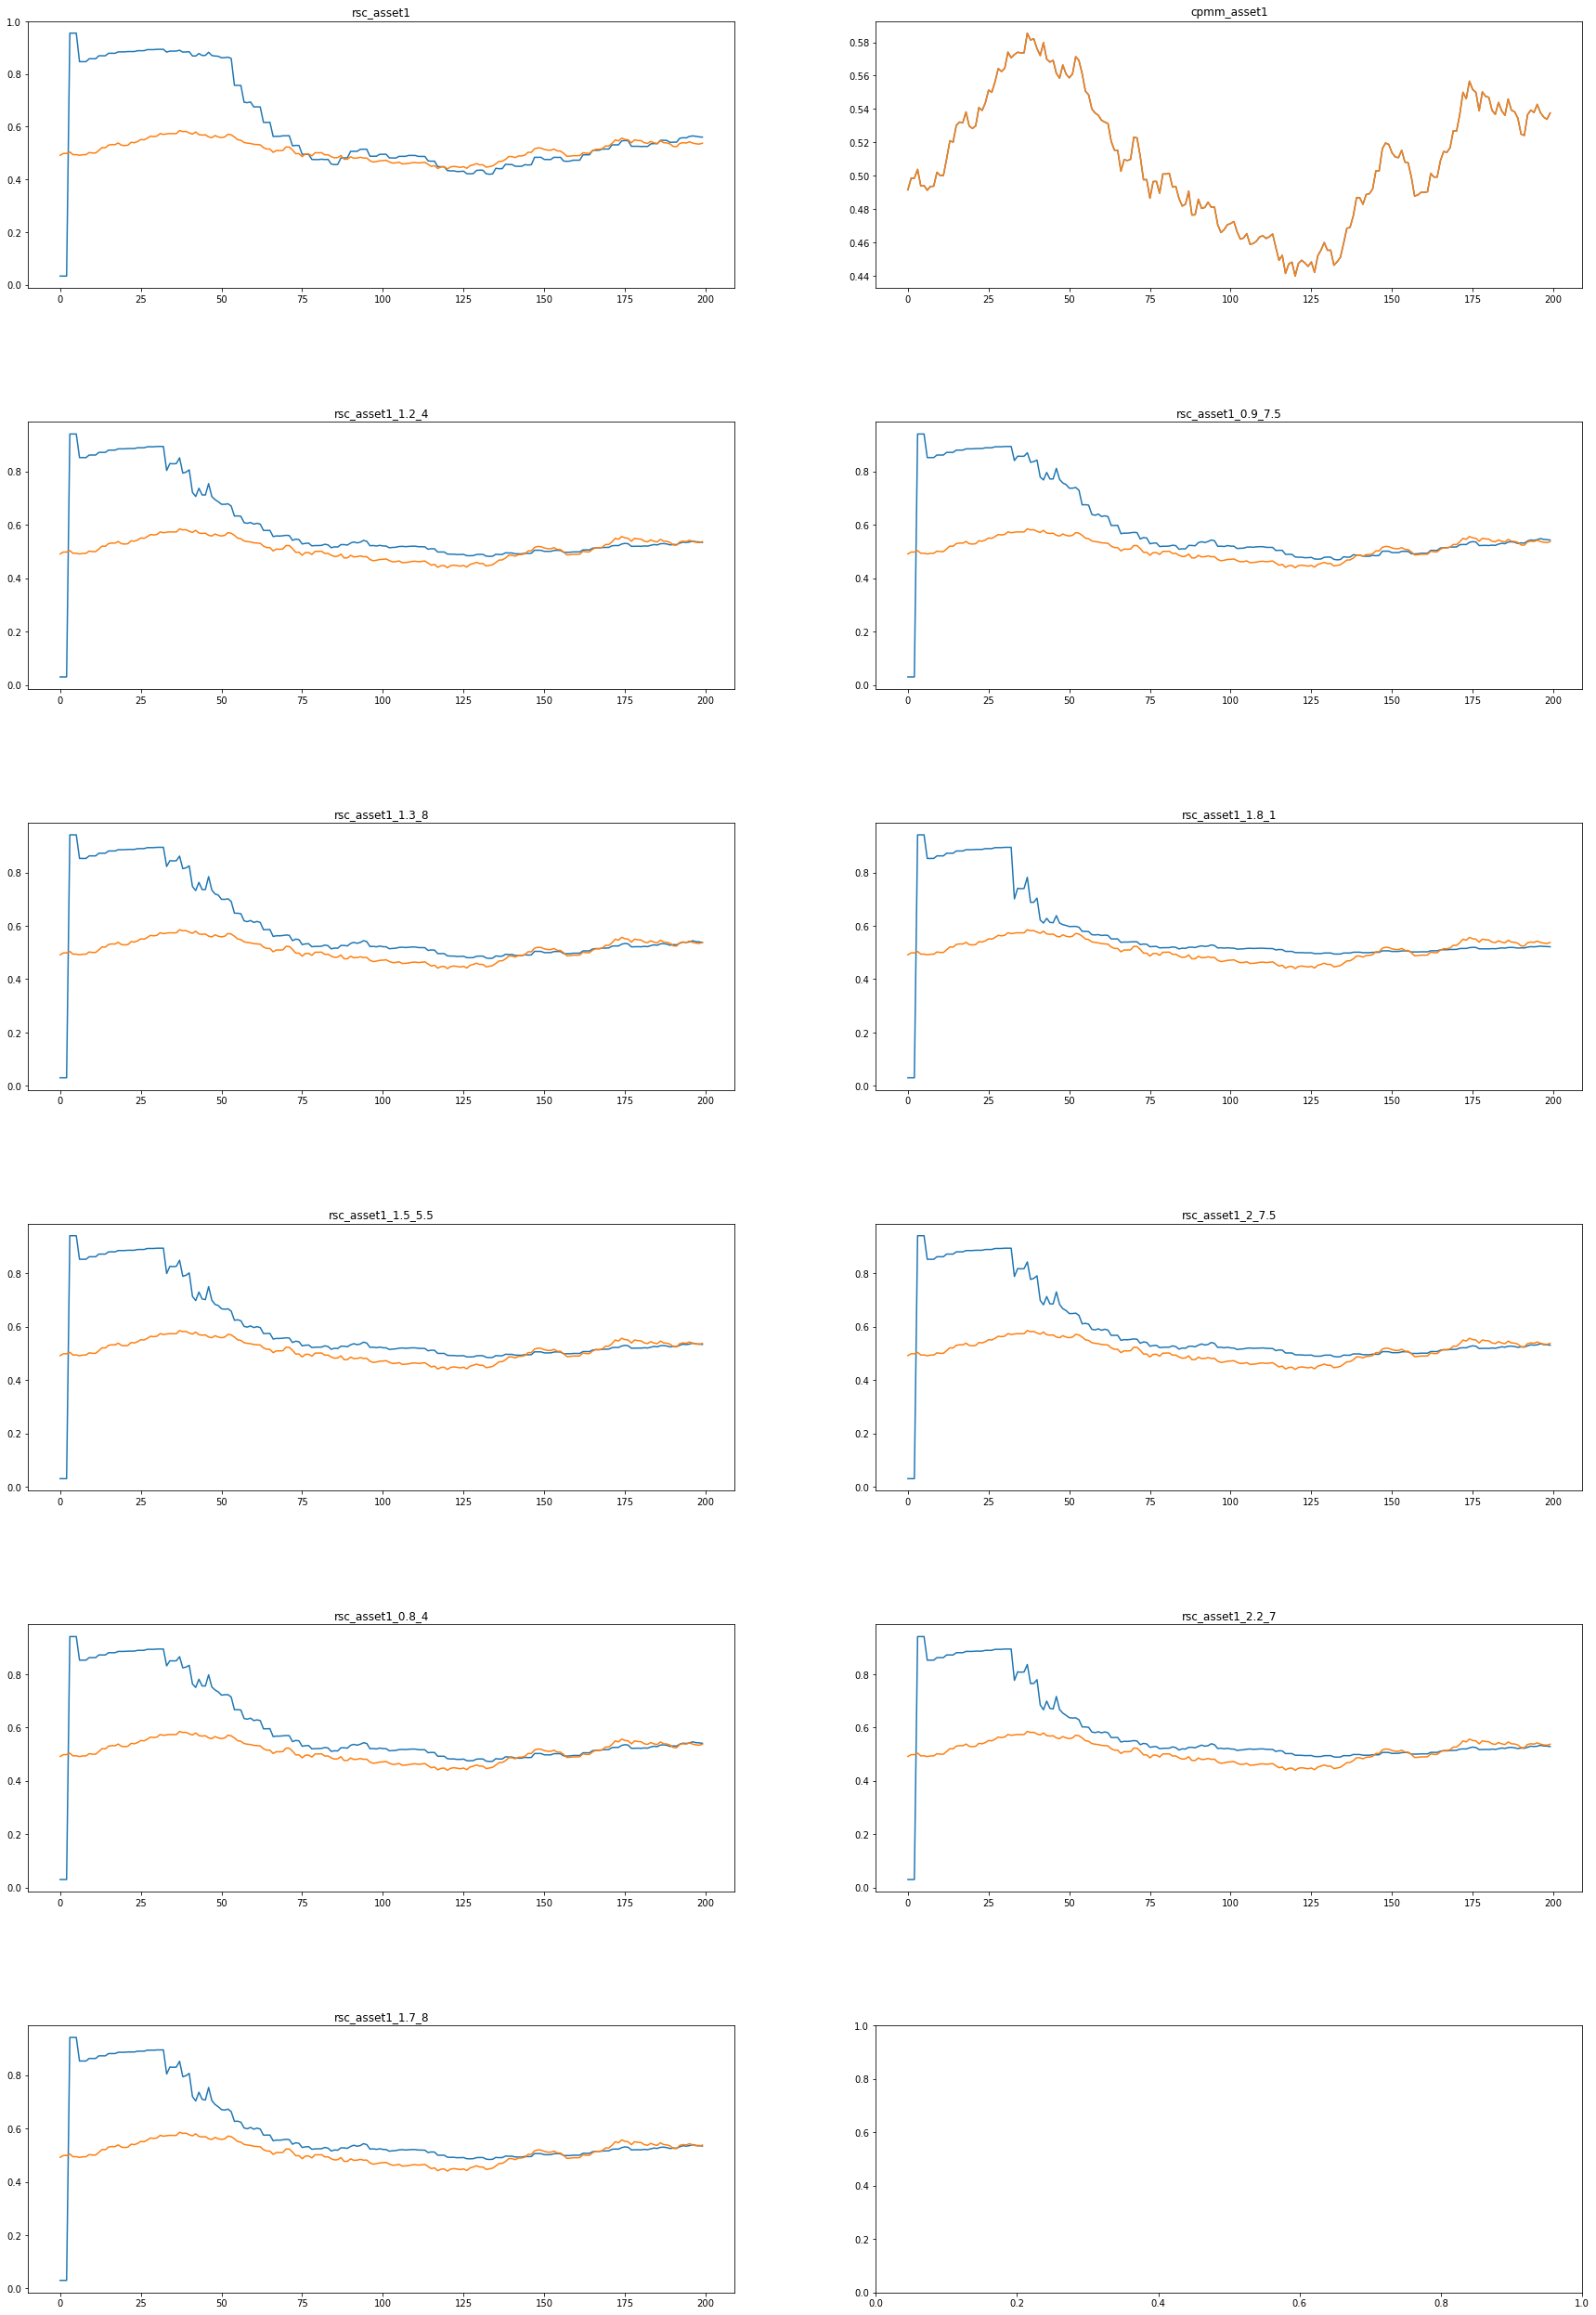

In [19]:
fig, axs = plt.subplots(6,2, figsize=(30, 45), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace= 0.2)

axs = axs.ravel()

for i in range(len(asset1_cols)):

    axs[i].plot(df[asset1_cols[i]])
    axs[i].plot(df['cpmm_asset1'])
    axs[i].set_title(asset1_cols[i])

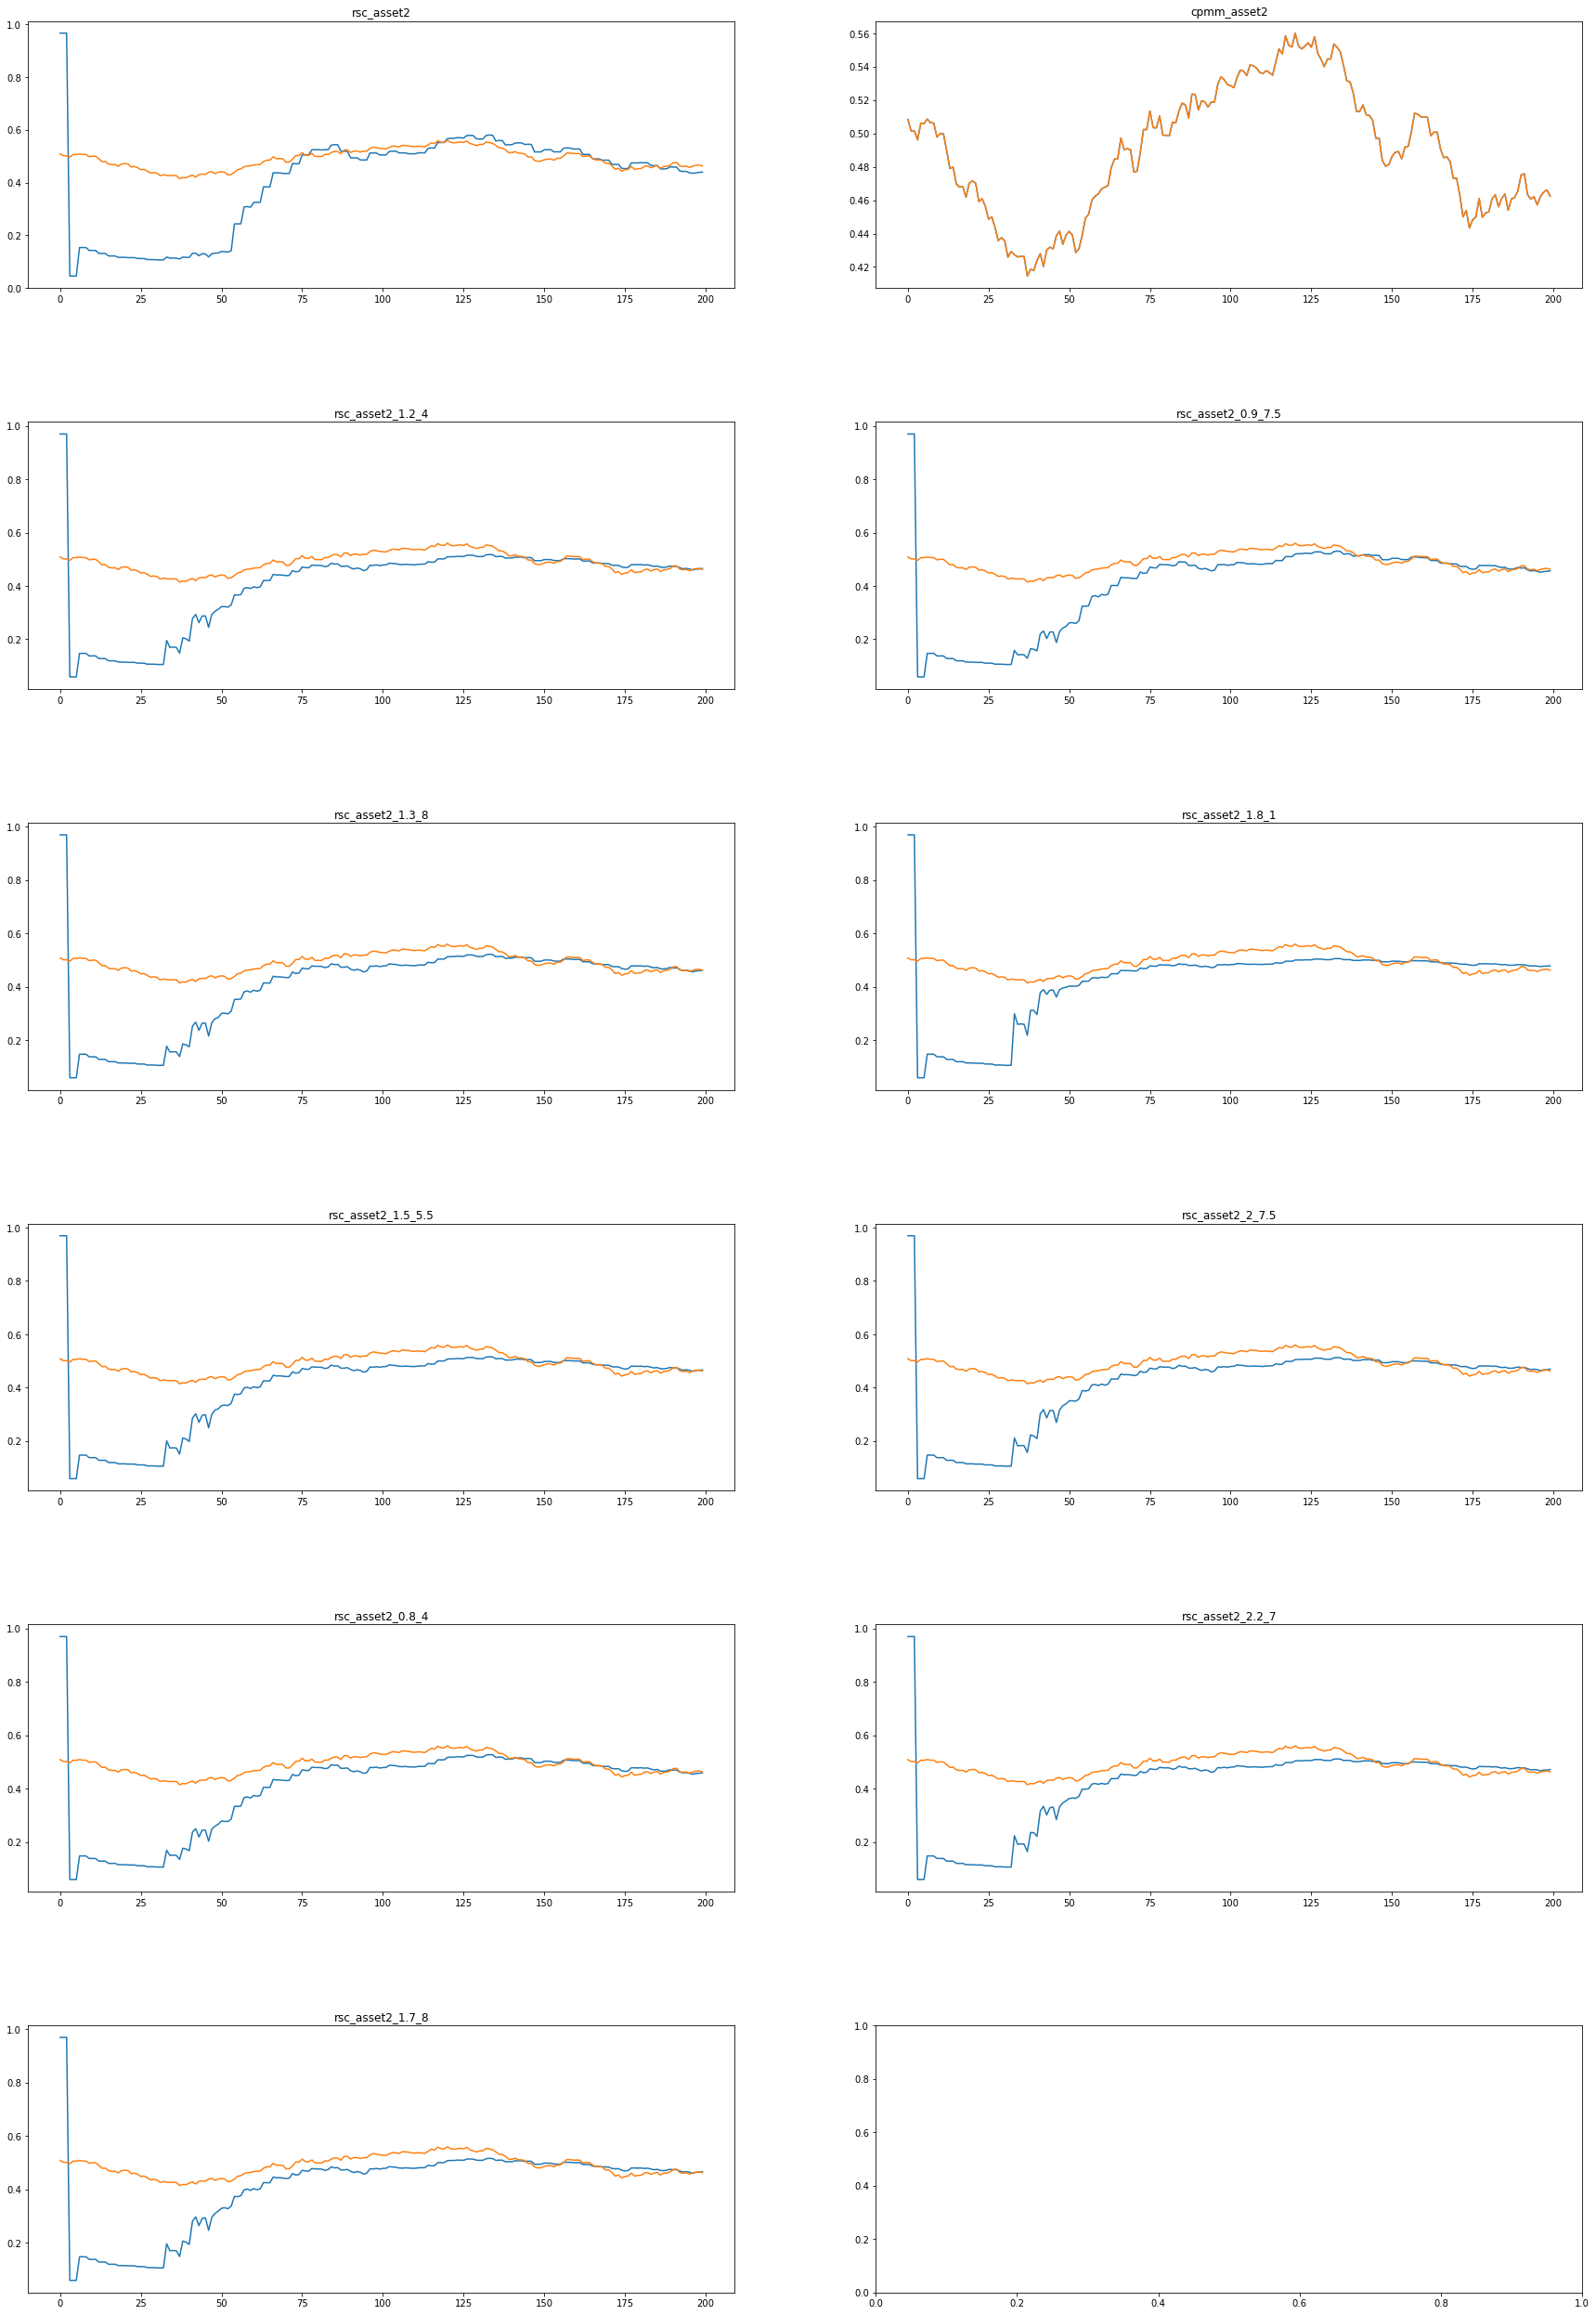

In [20]:
fig, axs = plt.subplots(6,2, figsize=(30, 45), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace= 0.2)

axs = axs.ravel()

for i in range(len(asset1_cols)):

    axs[i].plot(df[asset2_cols[i]])
    axs[i].plot(df['cpmm_asset2'])
    axs[i].set_title(asset2_cols[i])

In [21]:
rsc.book

,name,shares,outcome,paid,cost_function,dynamic_fee,lp
0,Trader-0,707.0752777378887,1,353.537639,713.892528,0.000000,0
1,Trader-1,-284.107294,0,4.726350,713.892528,0.000000,0
2,Trader-2,3.251707,A,0.030447,713.892528,0.000000,1
3,Trader-2,103.546576,B,0.969553,713.892528,0.000000,1
4,Trader-3,6327.63112122463,0,223.044866,6451.675705,0.000000,0
...,...,...,...,...,...,...,...
261,Trader-196,-196.560203,1,91.165484,40961.556311,0.573280,0
262,Trader-197,226.211049,A,0.539381,40961.556311,0.000000,1
263,Trader-197,193.179197,B,0.460619,40961.556311,0.000000,1
264,Trader-198,112.75526884230285,1,52.350296,40630.857959,0.555835,0
